#Women in Data Science
##Week 1 - Data Understanding

###Stephen Redmond
Enterprise Insight Studio Lead

In [0]:
# Connect to my Google Drive
from google.colab import drive

# You can mount a drive from code or from the Files button on the left (easier!)
#drive.mount('/content/drive')


We can use the "bang" (!) to run command lines

In [0]:
!ls '/content/drive/My Drive/WIDS'

WIDS_Dataset_2020_Adj.csv


#Loading data from a CSV file
We'll use the **pandas** library to load data into a **dataframe**.

In [0]:
# import the pandas library
# Traditionally, this is loaded and named as "pd"
import pandas as pd

# Titanic data from https://www.kaggle.com/c/titanic/data
# Load the Titanic data file from my Google Drive
df = pd.read_csv('/content/drive/My Drive/WIDS/titanic/train.csv')


Let's get a feel for the data by looking at the first few rows using **head**()

In [2]:
# Display some of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Data clense - de-dupe
Before we do anything, it might be a good idea to check for duplicate rows in the data.

In [3]:
lenBefore = len(df)
print("Before de-dupe: " + str(lenBefore))

# Drop duplicates
df = df.drop_duplicates() #df.columns.drop(['X']))

lenAfter = len(df)
print("After de-dupe: " + str(lenAfter))

print("We have removed " + str(lenBefore-lenAfter) + " duplicates.")

Before de-dupe: 891
After de-dupe: 891
We have removed 0 duplicates.


#Data Exploration
Let's look at the number of values in different fields. We can access one field by passing the name in single quotes inside square brackets. **df['name']**

In [4]:
# Get a count of values in one column
#df['Sex'].value_counts().sort_index()
#df['Age'].value_counts().sort_index()
#df['Cabin'].value_counts()

# What about if there are blanks?
df['Embarked'].value_counts(dropna = False)



S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

It will be a good time now to get some summary stats using the **describe**() function. This will show us very quickly where we have missing values.

Note that this will default to looking at numeric fields only (no sign of SKU!)

In [5]:
# Get summary stats of the table
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can get a description if we just pass text fields. We do this by passing an array of names instead of just one name. The array is also in square brackets, so you need two open and two close squares (tough to keep track of!) - **df[['field1','field2','field3']].describe**()

In [6]:
# Non numeric values in the table
df[["Name","Sex","Ticket","Cabin","Embarked"]].describe()


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Murdlin, Mr. Joseph",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


We can use the **matplotlib** library (the main visualisation library in Python) to view histograms for all our numeric data.

In **Jupyter Notebooks**, we can use a **magic** (%) to tell the notebook to display the images inline. Note that you have to load the magic before loading the library.

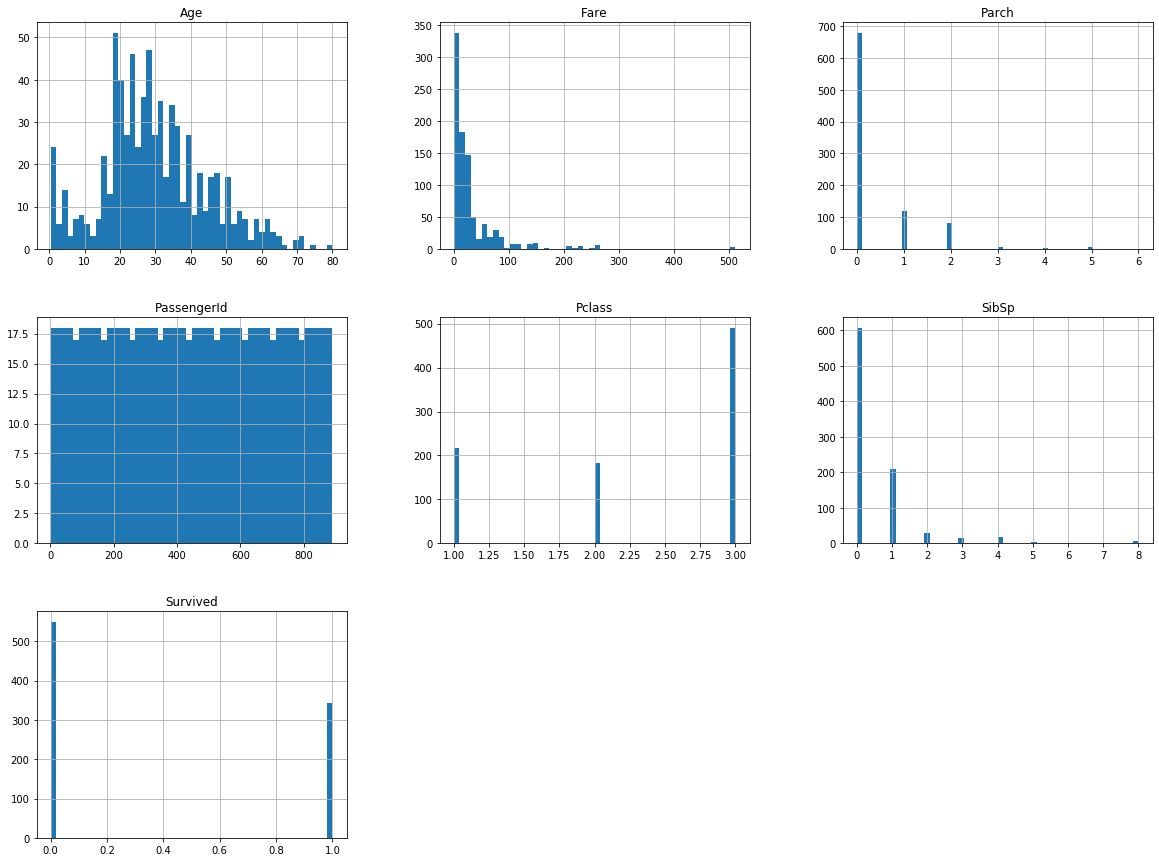

In [7]:
# Visual inspection of the numeric data using Histograms
%matplotlib inline

# matplotlib is traditionally loaded as "plt"
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

We can visually see if one variable seems to correlate with another using a **Scatter** plot

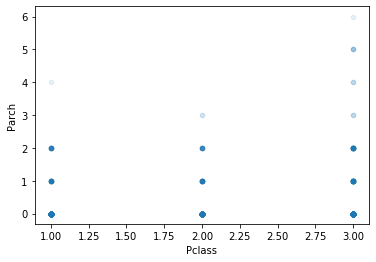

In [11]:
# Scatter plot
#df.plot(kind = "scatter", x = "Pclass", y = "Fare", alpha = 0.1)
df.plot(kind = "scatter", x = "Pclass", y = "Parch", alpha = 0.1)

The **pandas** library also gives us an option to visualise more than one correlation at a time. We just pass an array of the variables we want to compare.

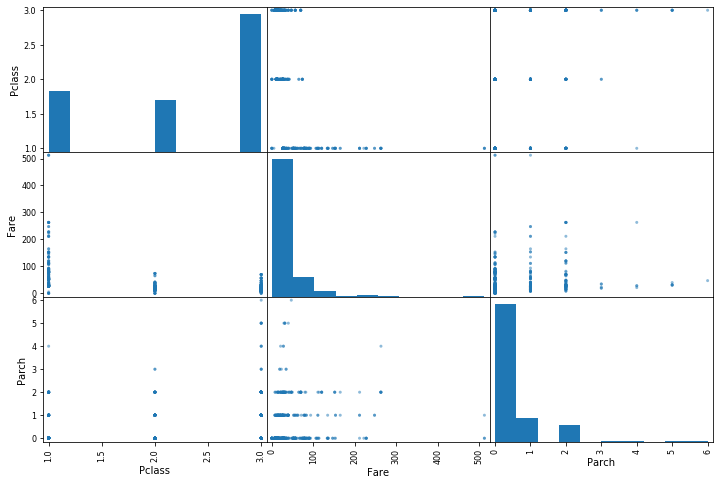

In [12]:
# scatter matrix
from pandas.plotting import scatter_matrix
attributes = ["Pclass", "Fare", "Parch"]
scatter_matrix(df[attributes], figsize=(12,8))
plt.show()

We can also do this numerically, calculating the **correlation coefficient** of all the numeric variables. (Closer to 1 is very correlated, -1 is negatively correlated, 0 is not correlated)

Note that **Block_Orientation** doesn't give a result. Any idea why?

In [13]:
# Correlation?
corr_matrix = df.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


We can zoom into one particular variable and show the most correlated values using a sort.

In [14]:
corr_matrix["Survived"].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

# Replacing missing values
Remember from above that we have some values missing from the data?

In [15]:
# Dealing with missing values
df['Age'].value_counts(dropna = False).sort_index()

0.42       1
0.67       1
0.75       2
0.83       2
0.92       1
        ... 
70.50      1
71.00      2
74.00      1
80.00      1
NaN      177
Name: Age, Length: 89, dtype: int64

Many data algorithms can't handle missing values (though some can!)  There are a number of options to deal with missing values. The one that you choose will often be informed by the business requirements.

One option is to just remove all of the rows that have a missing value:

In [16]:
# Option - get rid of the rows with missing values
new_df = df.dropna(subset=['Age'])
new_df['Age'].value_counts(dropna = False).sort_index()

0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Age, Length: 88, dtype: int64

Another option is to get rid of a whole column if it has missing values. This would be considered if it had, say, 30% missing.

In [17]:
# Option - get rid of the whole attribute!
new_df = df.drop('Age', axis=1)

try:
  new_df['Age']  # This will throw an error
except Exception as e:
  print("!!! An exception has occurred with " + str(e))

!!! An exception has occurred with 'Age'


A common option is to replace the missing values with some calculated value. This is called **Imputing**.

There are some complex ways of Imputation, including using other data science models to predict the values, but a simpler options that is often used is to use a measure of central tendancy such as **mean**, **median** or **mode**.

In [18]:
# Replace the missing value with something else, e.g. Median
median = df['Age'].median()
new_df = df
new_df['Age'].fillna(median, inplace=True)
new_df['Age'].value_counts(dropna = False).sort_index()

0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Age, Length: 88, dtype: int64

**sklearn** has a handy model called **SimpleImputer** that means we can automatically apply the chosen strategy to all fields that have missing values.

There is a limitation that we can't use a numeric strategy such as median on non-numeric data. So, we can create a separate data frame (df_num) to handle just the numeric data and another (df_str) to handle the non-numeric data.

In [0]:
# Handy function to automate this - Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

# Can only compute median on numeric values
df_num = df.drop(["Name","Sex","Ticket","Cabin","Embarked"], axis=1)

imputer.fit(df_num)

# The imputer returns an array of values, so we need to convert the result back to a DataFrame
new_df_num = pd.DataFrame(imputer.transform(df_num), columns=df_num.columns, index=df_num.index)

In [20]:
new_df_num.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


With non-numeric data we might replace missing values with a text value like "missing" or "blank" or, as in this case, replace with the modal ("most_frequent") value.

In [21]:
# We can also impute them, just not using median
imputer_str = SimpleImputer(strategy = 'most_frequent')

# Compute mode on non numeric values
df_str = df[["Name","Sex","Ticket","Cabin","Embarked"]]

imputer_str.fit(df_str)

new_df_str = pd.DataFrame(imputer_str.transform(df_str), columns=df_str.columns, index=df_str.index)

# New Table
new_df_str.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Murdlin, Mr. Joseph",male,347082,B96 B98,S
freq,1,577,7,691,646


In [0]:
new_df.describe()

# Data Visualisation
## Options to explore
There are many other ways of looking at data before you get to do any analytics! 

It is worth playing with different options. For example, boxplots:

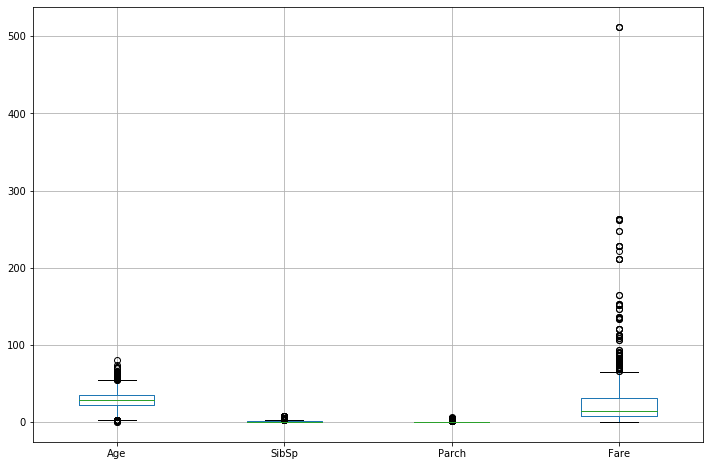

In [22]:
# Box plots
df[['Age','SibSp','Parch','Fare']].boxplot(figsize=(12,8))
plt.show()

In [0]:
# Handy library to do a lot of the profiling work for us!
!pip install pandas-profiling

In [25]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,891
Total Missing (%),6.4%
Total size in memory,90.5 KiB
Average record size in memory,104.0 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [0]:
# Export it to a file
profile.to_file('/content/drive/My Drive/WIDS/titanic/Profile.html')

In [28]:
!ls "/content/drive/My Drive/WIDS/titanic"

gender_submission.csv  Profile.html  test.csv  train.csv
